# Perekrutan Pemain Tengah Baru Manchester United
Pada projek ini saya akan membuat daftar pemain tengah yang bisa manchester united beli dengan mencantumkan label pada setiap pemain nya. Data nya saya ambil dari kaggle


In [1]:
import pandas as pd

pemain_df = pd.read_csv("players.csv")
pemain_df.head(5)

,id,name,now_cost,position,team,web_name,transfers_in_event,transfers_in,expected_goals_per_90,selected_rank_type,...,total_points,creativity_rank_type,starts,ep_next,saves_per_90,now_cost_rank,yellow_cards,threat_rank_type,selected_rank,transfers_out_event
0,3,Granit Xhaka,49,MID,Arsenal,Xhaka,580,825222,0.11,33,...,83,11,21,2.9,0.0,239,3,39,100,2079
1,4,Mohamed Elneny,41,MID,Arsenal,Elneny,109,196633,0.00,65,...,6,209,1,0.0,0.0,624,0,219,213,645
2,5,Rob Holding,42,DEF,Arsenal,Holding,13,6940,0.00,162,...,6,176,0,0.7,0.0,597,0,218,433,23
3,6,Thomas Partey,47,MID,Arsenal,Partey,240,98731,0.10,85,...,57,51,18,2.3,0.0,314,2,87,262,235
4,7,Martin Ødegaard,70,MID,Arsenal,Ødegaard,18110,4972316,0.30,2,...,121,7,20,4.1,0.0,42,3,13,5,14974


Karena Manchester united hanya mencari pemain tengah maka saya akan mengeliminasi position selain MID


In [2]:
pemain_tengah_df = pemain_df[pemain_df["position"] == "MID"]
pemain_tengah_df.head()


,id,name,now_cost,position,team,web_name,transfers_in_event,transfers_in,expected_goals_per_90,selected_rank_type,...,total_points,creativity_rank_type,starts,ep_next,saves_per_90,now_cost_rank,yellow_cards,threat_rank_type,selected_rank,transfers_out_event
0,3,Granit Xhaka,49,MID,Arsenal,Xhaka,580,825222,0.11,33,...,83,11,21,2.9,0.0,239,3,39,100,2079
1,4,Mohamed Elneny,41,MID,Arsenal,Elneny,109,196633,0.00,65,...,6,209,1,0.0,0.0,624,0,219,213,645
3,6,Thomas Partey,47,MID,Arsenal,Partey,240,98731,0.10,85,...,57,51,18,2.3,0.0,314,2,87,262,235
4,7,Martin Ødegaard,70,MID,Arsenal,Ødegaard,18110,4972316,0.30,2,...,121,7,20,4.1,0.0,42,3,13,5,14974
6,9,Nicolas Pépé,53,MID,Arsenal,Pépé,0,5198,0.00,156,...,0,318,0,0.0,0.0,158,0,316,439,7


Karena kita mencari pemain MID maka ada row table yang tidak perlu seperti expected_goals_per_90, threat_rank_type dan lain2 yang manchester united butuhkan untuk posisi MID adalah pemain yang kreativ dan juga mempunya jam terbang

In [3]:
pemain_tengah_berkualitas_df = pemain_tengah_df[["name", "position","team","web_name","creativity_rank_type","starts","now_cost"]]
pemain_tengah_berkualitas_df.head(5)

,name,position,team,web_name,creativity_rank_type,starts,now_cost
0,Granit Xhaka,MID,Arsenal,Xhaka,11,21,49
1,Mohamed Elneny,MID,Arsenal,Elneny,209,1,41
3,Thomas Partey,MID,Arsenal,Partey,51,18,47
4,Martin Ødegaard,MID,Arsenal,Ødegaard,7,20,70
6,Nicolas Pépé,MID,Arsenal,Pépé,318,0,53


kita akan mengeliminasi pemain yang menjadi starter minimal 7 pertandingan


In [4]:
pemain_mid_bagus = pemain_tengah_berkualitas_df[pemain_tengah_berkualitas_df["starts"] >= 7]
pemain_mid_bagus.head(5)

,name,position,team,web_name,creativity_rank_type,starts,now_cost
0,Granit Xhaka,MID,Arsenal,Xhaka,11,21,49
3,Thomas Partey,MID,Arsenal,Partey,51,18,47
4,Martin Ødegaard,MID,Arsenal,Ødegaard,7,20,70
10,Bukayo Saka,MID,Arsenal,Saka,5,21,83
15,Gabriel Martinelli Silva,MID,Arsenal,Martinelli,10,21,66


kita akan memvisualisasikan apakah team dari pemain terseubut memiliki kreativitas tinggi selama mereka bermain di club tersebut

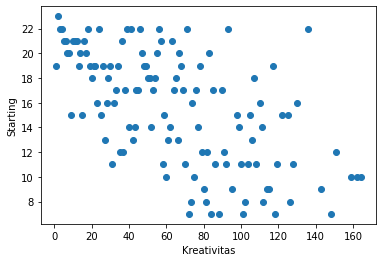

In [5]:
import matplotlib.pyplot as plt
plt.scatter(pemain_mid_bagus["creativity_rank_type"],pemain_mid_bagus["starts"])
plt.xlabel("Kreativitas")
plt.ylabel("Starting")
plt.show()

Kita akan menambahkan row baru yang berisikan label bewarna yang memiliki keterangan berdeda2 seperti Hijau = sangat rekomendasi, Biru = rata2 , merah = tidak layak

In [6]:
warna = []

for lab,row in pemain_mid_bagus.iterrows():
    if row["creativity_rank_type"]  >= 75:
        warna.append("Hijau")
    elif row["creativity_rank_type"] >= 25 :
        warna.append("Biru")
    else:
        warna.append("Merah")
print(warna)

['Merah', 'Biru', 'Merah', 'Merah', 'Merah', 'Biru', 'Hijau', 'Hijau', 'Biru', 'Biru', 'Biru', 'Biru', 'Hijau', 'Hijau', 'Biru', 'Hijau', 'Hijau', 'Hijau', 'Biru', 'Hijau', 'Hijau', 'Hijau', 'Merah', 'Hijau', 'Hijau', 'Merah', 'Merah', 'Biru', 'Biru', 'Hijau', 'Hijau', 'Hijau', 'Merah', 'Biru', 'Biru', 'Biru', 'Biru', 'Hijau', 'Merah', 'Merah', 'Biru', 'Merah', 'Merah', 'Biru', 'Hijau', 'Hijau', 'Hijau', 'Biru', 'Biru', 'Hijau', 'Merah', 'Biru', 'Biru', 'Merah', 'Hijau', 'Hijau', 'Biru', 'Hijau', 'Hijau', 'Merah', 'Biru', 'Merah', 'Biru', 'Hijau', 'Hijau', 'Biru', 'Hijau', 'Merah', 'Hijau', 'Biru', 'Biru', 'Merah', 'Biru', 'Biru', 'Biru', 'Biru', 'Biru', 'Biru', 'Merah', 'Biru', 'Hijau', 'Biru', 'Biru', 'Biru', 'Hijau', 'Hijau', 'Biru', 'Biru', 'Biru', 'Biru', 'Biru', 'Hijau', 'Merah', 'Hijau', 'Hijau', 'Hijau', 'Hijau', 'Hijau', 'Hijau', 'Biru', 'Merah', 'Hijau', 'Hijau', 'Merah', 'Biru', 'Hijau', 'Hijau', 'Biru', 'Biru', 'Merah', 'Biru', 'Hijau', 'Hijau', 'Hijau', 'Biru', 'Hijau', 'B

Kita tambahkan loop di atas ke tabel 

In [7]:
pemain_mid_bagus["Keterangan"] = warna
pemain_mid_bagus.head(5)    

C:\Users\Adrian Wibisono\AppData\Local\Temp\ipykernel_19104\1665684803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pemain_mid_bagus["Keterangan"] = warna


,name,position,team,web_name,creativity_rank_type,starts,now_cost,Keterangan
0,Granit Xhaka,MID,Arsenal,Xhaka,11,21,49,Merah
3,Thomas Partey,MID,Arsenal,Partey,51,18,47,Biru
4,Martin Ødegaard,MID,Arsenal,Ødegaard,7,20,70,Merah
10,Bukayo Saka,MID,Arsenal,Saka,5,21,83,Merah
15,Gabriel Martinelli Silva,MID,Arsenal,Martinelli,10,21,66,Merah


In [8]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pemain_mid_bagus

,name,position,team,web_name,creativity_rank_type,starts,now_cost,Keterangan
0,Granit Xhaka,MID,Arsenal,Xhaka,11,21,49,Merah
3,Thomas Partey,MID,Arsenal,Partey,51,18,47,Biru
4,Martin Ødegaard,MID,Arsenal,Ødegaard,7,20,70,Merah
10,Bukayo Saka,MID,Arsenal,Saka,5,21,83,Merah
15,Gabriel Martinelli Silva,MID,Arsenal,Martinelli,10,21,66,Merah
24,Leandro Trossard,MID,Arsenal,Trossard,32,16,67,Biru
25,Jorge Luiz Frello Filho,MID,Arsenal,Jorginho,105,15,58,Hijau
41,John McGinn,MID,Aston Villa,McGinn,99,14,51,Hijau
46,Emiliano Buendía Stati,MID,Aston Villa,Buendía,52,14,57,Biru
49,Leon Bailey,MID,Aston Villa,Bailey,50,18,45,Biru


Diatas merupakan daftar pemain yang bisa menjadi bahan pertimbangan Manchester united untuk pemain tengah yang sudah di labeli dengan warna. sekian dari projek saya adrian wibisono undur diri

AttributeError: PathCollection.set() got an unexpected keyword argument 'yerr'

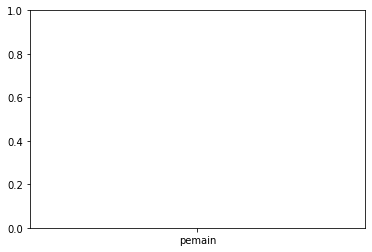